# K Means Clustering

### Step 1.  Import libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Step 2. Load data

In [24]:
contents = pd.read_csv('HackneyData.csv')

In [41]:
contents.head()
contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
ward      19 non-null object
age       19 non-null float64
income    19 non-null float64
dtypes: float64(2), object(1)
memory usage: 536.0+ bytes


### Step 3. Transform the data for python

In [26]:
contents.columns = ['ward','age','income']

In [27]:
contents.head()

,ward,age,income
0,Brownswood,33.2,"£48,860.00"
1,Cazenove,29.2,"£46,380.00"
2,Chatham,32.1,"£39,570.00"
3,Clissold,33.6,"£56,050.00"
4,Dalston,32.8,"£46,500.00"


In [28]:
contents['income'] = contents['income'].replace('[\£,]','',regex=True).astype(float)

In [29]:
contents.head()

,ward,age,income
0,Brownswood,33.2,48860.0
1,Cazenove,29.2,46380.0
2,Chatham,32.1,39570.0
3,Clissold,33.6,56050.0
4,Dalston,32.8,46500.0


### Step 4. Visualise the data

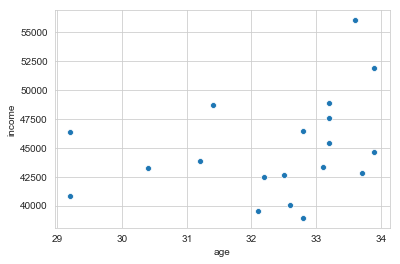

In [34]:
sns.scatterplot(x='age',y='income',data=contents)

### Step 5. Apply K-means clustering

In [48]:
data = []
for index, row in contents.iterrows():
    age = row['age']
    income = row['income']
    data.append([float(age),float(income)])

In [49]:
data

[[33.2, 48860.0],
 [29.2, 46380.0],
 [32.1, 39570.0],
 [33.6, 56050.0],
 [32.8, 46500.0],
 [33.2, 47560.0],
 [33.7, 42840.0],
 [33.1, 43360.0],
 [31.2, 43830.0],
 [32.2, 42490.0],
 [32.8, 38930.0],
 [32.5, 42650.0],
 [31.4, 48700.0],
 [30.4, 43230.0],
 [33.9, 44620.0],
 [29.2, 40810.0],
 [33.9, 51920.0],
 [33.2, 45410.0],
 [32.6, 40010.0]]

In [50]:
from sklearn.cluster import KMeans

In [71]:
km = KMeans(n_clusters=4,verbose=0)

In [117]:
X = contents.drop('ward',axis=1).astype(float)
y = contents['ward']

In [118]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [119]:
contents['cluster'] = km.labels_.astype(int)

### Step 6. Visualise the clusters

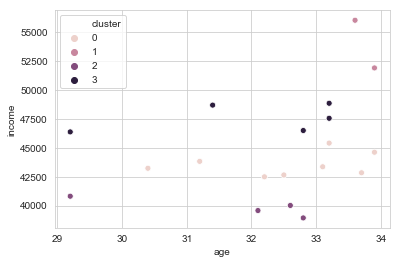

In [120]:
sns.scatterplot(x='age',y='income',hue='cluster',data=contents)

In [121]:
groups = contents.groupby(by='cluster')

# plot the clusters
# cmd forward slash to comment uncomment
# fig, ax = plt.subplots()
for name, group in groups:
    print('---')
    print(group)
    

---
               ward   age   income  cluster  cluster2
6   Hackney Central  33.7  42840.0        0         2
7     Hackney Downs  33.1  43360.0        0         2
8        Haggerston  31.2  43830.0        0         1
9            Hoxton  32.2  42490.0        0         2
11        Leabridge  32.5  42650.0        0         2
13        New River  30.4  43230.0        0         1
14     Queensbridge  33.9  44620.0        0         2
17         Victoria  33.2  45410.0        0         2
---
                       ward   age   income  cluster  cluster2
3                  Clissold  33.6  56050.0        1         0
16  Stoke Newington Central  33.9  51920.0        1         0
---
           ward   age   income  cluster  cluster2
2       Chatham  32.1  39570.0        2         2
10  King's Park  32.8  38930.0        2         2
15  Springfield  29.2  40810.0        2         1
18         Wick  32.6  40010.0        2         2
---
           ward   age   income  cluster  cluster2
0    Brownsw

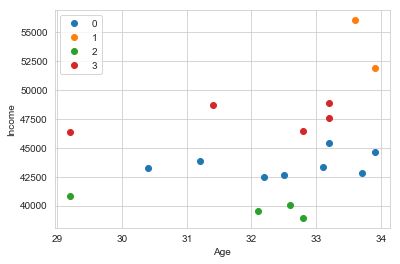

In [122]:
groups = contents.groupby(by='cluster')

# plot the clusters
# cmd forward slash to comment uncomment
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['age'],group['income'],marker='o',ls='',label=name)

plt.xlabel('Age')
plt.ylabel('Income')
ax.legend()

#### Step 7.  Doesn't seem quite right... the data isn't scaled properly!

In [123]:
from sklearn.preprocessing import scale

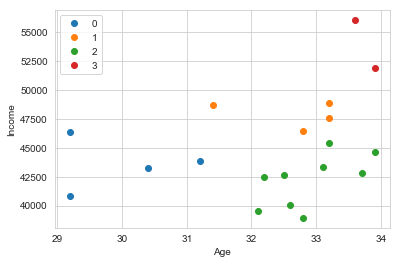

In [129]:
km2 = KMeans(n_clusters=4,verbose=0)
km2.fit(scale(X))
contents['cluster2'] = km2.labels_.astype(int)
groups = contents.groupby(by='cluster2')

# plot the clusters
# cmd forward slash to comment uncomment
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['age'],group['income'],marker='o',ls='',label=name)

plt.xlabel('Age')
plt.ylabel('Income')
ax.legend()

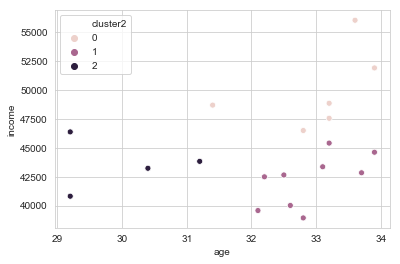

In [125]:
sns.scatterplot(x='age',y='income',data=contents,hue='cluster2')

### Step 8. Use Elbow test to decide number of clusters

In [126]:
num_clusters = list(range(1,10))

In [127]:
kmeans = [KMeans(n_clusters=i) for i in num_clusters]
score = [kmeans[i-1].fit(scale(X)).score(scale(X)) for i in num_clusters]

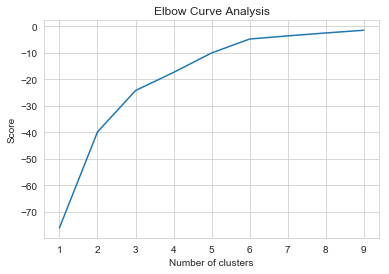

In [128]:
plt.plot(num_clusters,score)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve Analysis')
plt.show()

In [130]:
contents.head()

,ward,age,income,cluster,cluster2
0,Brownswood,33.2,48860.0,3,1
1,Cazenove,29.2,46380.0,3,0
2,Chatham,32.1,39570.0,2,2
3,Clissold,33.6,56050.0,1,3
4,Dalston,32.8,46500.0,3,1


In [132]:
for index, row in contents.sort_values(by=['cluster2','ward']).iterrows():
    print('---')
    print(row['ward'],row['cluster2'])

---
Cazenove 0
---
Haggerston 0
---
New River 0
---
Springfield 0
---
Brownswood 1
---
Dalston 1
---
De Beauvoir 1
---
Lordship 1
---
Chatham 2
---
Hackney Central 2
---
Hackney Downs 2
---
Hoxton 2
---
King's Park 2
---
Leabridge 2
---
Queensbridge 2
---
Victoria 2
---
Wick 2
---
Clissold 3
---
Stoke Newington Central 3


In [133]:
dir()

['In',
 'KMeans',
 'Out',
 'X',
 '_',
 '_10',
 '_108',
 '_11',
 '_112',
 '_113',
 '_118',
 '_120',
 '_122',
 '_124',
 '_125',
 '_129',
 '_130',
 '_16',
 '_18',
 '_20',
 '_23',
 '_25',
 '_27',
 '_29',
 '_31',
 '_33',
 '_34',
 '_37',
 '_40',
 '_47',
 '_49',
 '_54',
 '_55',
 '_57',
 '_60',
 '_62',
 '_64',
 '_66',
 '_70',
 '_73',
 '_75',
 '_76',
 '_78',
 '_8',
 '_81',
 '_83',
 '_84',
 '_85',
 '_87',
 '_89',
 '_91',
 '_96',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i100',
 '_i101',
 '_i102',
 '_i103',
 '_i104',
 '_i105',
 '_i106',
 '_i107',
 '_i108',
 '_i109',
 '_i11',
 '_i110',
 '_i111',
 '_i112',
 '_i113',
 '_i114',
 '_i115',
 '_i116',
 '_i117',
 '_i118',
 '_i119',
 '_i12',
 '_i120',
 '_i121',
 '_i122',
 '_i123',
 '_i124',
 '_i125',
 '_i126',
 '_i127',
 '_i128',
 '_i129',
 '_i13',
 '_i130',
 '_i131',
 '_i132',
 '_i133',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',

In [134]:
dir(X)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__

In [135]:
import antigravity